<a href="https://colab.research.google.com/github/ByeongGwan31/Analysis_Weather_and_Delivery/blob/main/%EB%82%A0%EC%94%A8%EC%99%80_%EB%B0%B0%EB%8B%AC%EA%B0%84%EC%9D%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 Mount 연결하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. ASOS 일 자료 준비하기

- 서비스 키 받은 후, 서비스요청 준비하기 단계

### 2019년 07월 21일 ~ 2019년 12월 31일 데이터 추출

In [2]:
!pip install python-dotenv

In [3]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os

from google.colab import drive
drive.mount('/content/drive')

env_path = '/content/drive/MyDrive/Analysis_Weather_Delivery/.env.txt'

load_dotenv(env_path)

serviceKey = os.getenv('SERVICE_KEY')
startDt = "20190721"
endDt = "20191231"
stnId = 108
numOfRows = 500

url = f"http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey={serviceKey}&pageNo=1&numOfRows={numOfRows}&dataType=JSON&dataCd=ASOS&dateCd=DAY&startDt={startDt}&endDt={endDt}&stnIds={stnId}"

response = requests.get(url)
data = response.json()

items = data['response']['body']['items']['item']
weather_data = [
    {
        'Date': item['tm'],
        'maxTa': item['maxTa'],
        'minTa': item['minTa'],
        'avgTa': item['avgTa'],
        'sumRn': item['sumRn'],
        'maxWs': item['maxWs'],
        'avgRhm': item.get('avgRhm'),
        'ddMefs': item.get('ddMefs'),
        'ddMefsHrmt': item.get('ddMefsHrmt')
    }
    for item in items
]

df_weather = pd.DataFrame(weather_data)

print(df_weather.iloc[0])
print(df_weather.iloc[-1])

df_weather.to_csv('Seoul_Weather_Data_19y.csv', index = False, encoding = 'utf-8-sig')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Date          2019-07-21
maxTa               27.0
minTa               24.2
avgTa               25.1
sumRn                6.2
maxWs                4.4
avgRhm              87.1
ddMefs                  
ddMefsHrmt              
Name: 0, dtype: object
Date          2019-12-31
maxTa               -4.5
minTa              -10.9
avgTa               -7.9
sumRn                0.0
maxWs                7.5
avgRhm              39.3
ddMefs                  
ddMefsHrmt              
Name: 163, dtype: object


### 2020년 1월 1일부터 ~ 2020년 7월 20일 데이터 추출

In [4]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os

env_path = '/content/drive/MyDrive/Analysis_Weather_Delivery/.env.txt'

load_dotenv(env_path)

serviceKey = os.getenv('SERVICE_KEY')
startDt = "20200101"
endDt = "20200720"
stnId = 108
numOfRows = 500

url = f"http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey={serviceKey}&pageNo=1&numOfRows={numOfRows}&dataType=JSON&dataCd=ASOS&dateCd=DAY&startDt={startDt}&endDt={endDt}&stnIds={stnId}"

response = requests.get(url)
data = response.json()

items = data['response']['body']['items']['item']
weather_data = [
    {
        'Date': item['tm'],
        'maxTa': item['maxTa'],
        'minTa': item['minTa'],
        'avgTa': item['avgTa'],
        'sumRn': item['sumRn'],
        'maxWs': item['maxWs'],
        'avgRhm': item.get('avgRhm'),
        'ddMefs': item.get('ddMefs'),
        'ddMefsHrmt': item.get('ddMefsHrmt')
    }
    for item in items
]

df_weather = pd.DataFrame(weather_data)

print(df_weather.iloc[0])
print(df_weather.iloc[-1])
df_weather.to_csv('Seoul_Weather_Data_20y.csv', index = False, encoding = 'utf-8-sig')


Date          2020-01-01
maxTa                0.3
minTa               -6.5
avgTa               -2.2
sumRn                0.1
maxWs                2.6
avgRhm              64.4
ddMefs               0.0
ddMefsHrmt              
Name: 0, dtype: object
Date          2020-07-20
maxTa               26.6
minTa               22.4
avgTa               23.8
sumRn                3.6
maxWs                7.0
avgRhm              86.3
ddMefs                  
ddMefsHrmt              
Name: 201, dtype: object


# 2. 배달 데이터 수집 후 전처리
- 배달 데이터 깃허브에서 확인 후, 컬럼에서 서울만 지정 후, csv로 저장
- 2019년, 2020년 배달 데이터는 용량이 너무 크기 때문에 미리 전처리를 완료하여 완료된 파일은 GitHub에 업로드하여 사용하였습니다.

In [5]:
import pandas as pd

delivery_19y_df = pd.read_csv('/content/drive/MyDrive/Analysis_Weather_Delivery/2019년_지역별 배달데이터.csv')
delivery_20y_df = pd.read_csv('/content/drive/MyDrive/Analysis_Weather_Delivery/2020년_지역별 배달데이터.csv')

In [6]:
delivery_19y_df.head()

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DESTINATION_BRTC_NM,DESTINATION_SIGUNGU_NM,ORDER_CASCNT
0,2019-05-01,0,족발/보쌈,충청북도,제천시,2
1,2019-05-01,0,치킨,충청북도,제천시,5
2,2019-05-01,1,치킨,충청북도,제천시,6
3,2019-05-01,10,패스트푸드,충청북도,제천시,1
4,2019-05-01,10,한식,충청북도,제천시,4


In [7]:
delivery_20y_df.head()

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DESTINATION_BRTC_NM,DESTINATION_SIGUNGU_NM,ORDER_CASCNT
0,2020-01-01,0,돈까스/일식,경기도,고양시 덕양구,2
1,2020-01-01,0,돈까스/일식,경기도,광명시,6
2,2020-01-01,0,돈까스/일식,경기도,부천시,3
3,2020-01-01,0,돈까스/일식,경기도,의정부시,7
4,2020-01-01,0,돈까스/일식,전라북도,군산시,5


In [8]:
delivery_19y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753360 entries, 0 to 753359
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DE                      753360 non-null  object
 1   HRLY_TIME               753360 non-null  int64 
 2   DLVR_STORE_INDUTY_NM    753360 non-null  object
 3   DESTINATION_BRTC_NM     753360 non-null  object
 4   DESTINATION_SIGUNGU_NM  753360 non-null  object
 5   ORDER_CASCNT            753360 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 34.5+ MB


In [9]:
delivery_20y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   DE                      1048575 non-null  object
 1   HRLY_TIME               1048575 non-null  int64 
 2   DLVR_STORE_INDUTY_NM    1048575 non-null  object
 3   DESTINATION_BRTC_NM     1048575 non-null  object
 4   DESTINATION_SIGUNGU_NM  1048575 non-null  object
 5   ORDER_CASCNT            1048575 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [10]:
import pandas as pd

delivery_19y_df = pd.read_csv('/content/drive/MyDrive/Analysis_Weather_Delivery/2019년_지역별 배달데이터.csv')

delivery_19y_df['DE'] = pd.to_datetime(delivery_19y_df['DE'])

start_date = '2019-07-21'
end_date = '2019-12-31'

filtered_delivery_19y_df = delivery_19y_df[
    (delivery_19y_df['DE'] >= pd.to_datetime(start_date)) &
    (delivery_19y_df['DE'] <= pd.to_datetime(end_date)) &
    (delivery_19y_df['DESTINATION_BRTC_NM'] == '서울특별시')
]

print(filtered_delivery_19y_df.head())


              DE  HRLY_TIME DLVR_STORE_INDUTY_NM DESTINATION_BRTC_NM  \
42919 2019-07-21          0                   분식               서울특별시   
42924 2019-07-21          0                   야식               서울특별시   
42925 2019-07-21          0                   야식               서울특별시   
42929 2019-07-21          0                족발/보쌈               서울특별시   
42930 2019-07-21          0                족발/보쌈               서울특별시   

      DESTINATION_SIGUNGU_NM  ORDER_CASCNT  
42919                    구로구             2  
42924                    구로구             7  
42925                   영등포구             3  
42929                    구로구             1  
42930                    도봉구             1  


In [11]:
filtered_delivery_19y_df.to_csv('Seoul_Delivery_Data_19y.csv', index=False, encoding='utf-8-sig')

# Seoul 부분만 빼서 euc-kr로 인코딩 형식을 변환하고, Seoul_Deliver_Data_19y.csv 로 저장함.

In [12]:
import pandas as pd

delivery_20y_df = pd.read_csv('/content/drive/MyDrive/Analysis_Weather_Delivery/2020년_지역별 배달데이터.csv')
delivery_20y_df['DE'] = pd.to_datetime(delivery_20y_df['DE'])

start_date = '2020-01-01'
end_date = '2020-07-20'
filtered_delivery_20y_df = delivery_20y_df[
    (delivery_20y_df['DE'] >= pd.to_datetime(start_date)) &
    (delivery_20y_df['DE'] <= pd.to_datetime(end_date)) &
    (delivery_20y_df['DESTINATION_BRTC_NM'] == '서울특별시')
]

print(filtered_delivery_20y_df.head())

           DE  HRLY_TIME DLVR_STORE_INDUTY_NM DESTINATION_BRTC_NM  \
19 2020-01-01          0                   분식               서울특별시   
20 2020-01-01          0                   분식               서울특별시   
21 2020-01-01          0                   분식               서울특별시   
22 2020-01-01          0                   분식               서울특별시   
44 2020-01-01          0                   야식               서울특별시   

   DESTINATION_SIGUNGU_NM  ORDER_CASCNT  
19                    관악구             2  
20                    구로구             1  
21                    금천구             2  
22                    노원구             8  
44                    구로구             4  


In [13]:
filtered_delivery_20y_df.to_csv('Seoul_Delivery_Data_20y.csv', index=False, encoding='utf-8-sig')

# Seoul 부분만 빼서 utf-8로 인코딩 형식을 변환하고, Seoul_Deliver_Data_20y.csv 로 저장함.

# 3. 데이터 추출 완료
---
### Seoul_Weater_Data 🌥️
1. Date (날짜)
2. maxTa (최고기온)
3. minTa (최저기온)
4. avgTa (평균기온)
5. sumRn (총 강수량)
6. maxWs (총 풍속 m/s)
---
### Seoul_Delivery_Data 🏍️
1. De (주문날짜)
2. HRLY_TIME (주문 시간)
3. DLVR_STORE_INDUTY_NM (배달 상점 업종명, 카테고리)
4. DESTINATION_BRTC_NM (배달 목적지 주소, 광역도명)
5. DESTINATION_SIGUNGU_NM (배달 목적지 주소, 시군구명)
6. ORDER_CASCNT (주문 건수)
---

# 데이터 병합 과정

### ByeongGwan31 GitHub 내에 있는 csv 파일 참고

- 여기서부터 csv 파일들은 [GitHub](https://github.com/ByeongGwan31/Analysis_Weather_and_Delivery) 이곳에서 데이터를 불러오는 방식으로 진행하였습니다.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors

from google.colab import drive
drive.mount('/content/drive')

!wget -O /content/NanumGothic.ttf 'https://raw.githubusercontent.com/ByeongGwan31/Analysis_Weather_and_Delivery/main/NanumGothic.ttf'

font_path = '/content/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

github_base_url = 'https://raw.githubusercontent.com/ByeongGwan31/Analysis_Weather_and_Delivery/main/'

delivery_df_19 = pd.read_csv(github_base_url + 'Seoul_Delivery_Data_19y.csv')
delivery_df_19['DE'] = pd.to_datetime(delivery_df_19['DE'])

delivery_df_20 = pd.read_csv(github_base_url + 'Seoul_Delivery_Data_20y.csv')
delivery_df_20['DE'] = pd.to_datetime(delivery_df_20['DE'])

weather_df_19 = pd.read_csv(github_base_url + 'Seoul_Weather_Data_19y.csv')
weather_df_19['DE'] = pd.to_datetime(weather_df_19['Date'])
weather_df_19.drop(columns='Date', inplace=True)

weather_df_20 = pd.read_csv(github_base_url + 'Seoul_Weather_Data_20y.csv')
weather_df_20['DE'] = pd.to_datetime(weather_df_20['Date'])
weather_df_20.drop(columns='Date', inplace=True)

delivery_df = pd.concat([delivery_df_19, delivery_df_20], ignore_index=True)
weather_df = pd.concat([weather_df_19, weather_df_20], ignore_index=True)
combined_df = pd.merge(delivery_df, weather_df, on='DE', how='inner')

print("Combined data shape:", combined_df.shape)
print("Unique dates in combined data:", combined_df['DE'].nunique())
print(combined_df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2024-06-13 06:41:27--  https://raw.githubusercontent.com/ByeongGwan31/Analysis_Weather_and_Delivery/main/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4691820 (4.5M) [application/octet-stream]
Saving to: ‘/content/NanumGothic.ttf’

/content/NanumGothi 100%[===================>]   4.47M  15.7MB/s    in 0.3s    

2024-06-13 06:41:27 (15.7 MB/s) - ‘/content/NanumGothic.ttf’ saved [4691820/4691820]

Combined data shape: (371603, 14)
Unique dates in combined data: 365
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371603 entries, 0 to 371602
Data columns (total 14 columns):
 #   Column                  Non-Null Co

## (1) 기온 구간별 평균 배달 건수 그래프

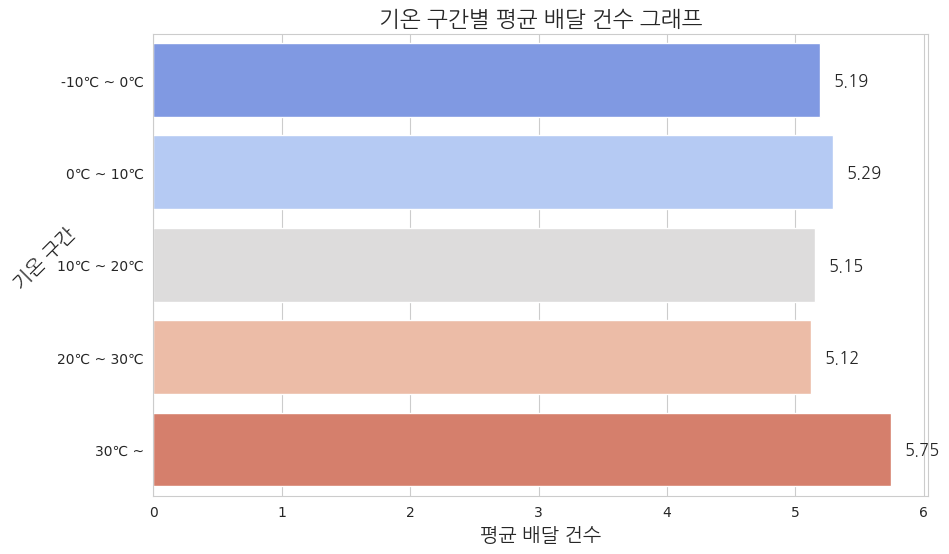

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

temperature_bins = [-10, 0, 10, 20, 30, np.inf]
temperature_labels = ['-10℃ ~ 0℃', '0℃ ~ 10℃', '10℃ ~ 20℃', '20℃ ~ 30℃', '30℃ ~']
combined_df['temp_range'] = pd.cut(combined_df['avgTa'], bins = temperature_bins, labels = temperature_labels)

average_orders_by_temp = combined_df.groupby('temp_range')['ORDER_CASCNT'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
bar = sns.barplot(data = average_orders_by_temp, x = 'ORDER_CASCNT', y = 'temp_range', hue = 'temp_range', orient = 'h', palette = 'coolwarm', dodge = False)
plt.title('기온 구간별 평균 배달 건수 그래프', fontproperties = fontprop, fontsize = 16)
plt.xlabel('평균 배달 건수', fontproperties = fontprop, fontsize = 14)
plt.ylabel('기온 구간', fontproperties = fontprop, rotation = 45, fontsize = 14)

for p in bar.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2,
             '{:1.2f}'.format(width),
             ha = 'left', va = 'center',
             fontproperties = fontprop, fontsize = 12)

plt.show()

## (2) 월별 총 배달건수 그래프

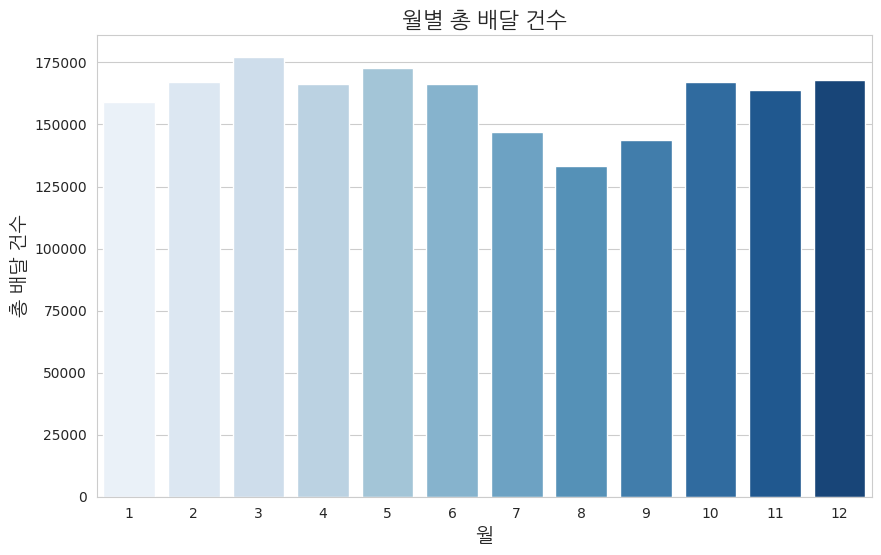

In [16]:
combined_df['delivery_month'] = pd.to_datetime(combined_df['DE']).dt.month

monthly_orders = combined_df.groupby('delivery_month')['ORDER_CASCNT'].sum().reset_index()

palette = sns.color_palette("Blues", n_colors = len(monthly_orders))

plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
bar = sns.barplot(data = monthly_orders, x = 'delivery_month', y = 'ORDER_CASCNT', hue = 'delivery_month', dodge = False, palette = palette)
plt.title('월별 총 배달 건수', fontproperties = fontprop, fontsize = 16)
plt.xlabel('월', fontproperties = fontprop, fontsize = 14)
plt.ylabel('총 배달 건수', fontproperties = fontprop, fontsize = 14)

plt.legend().remove()
plt.show()

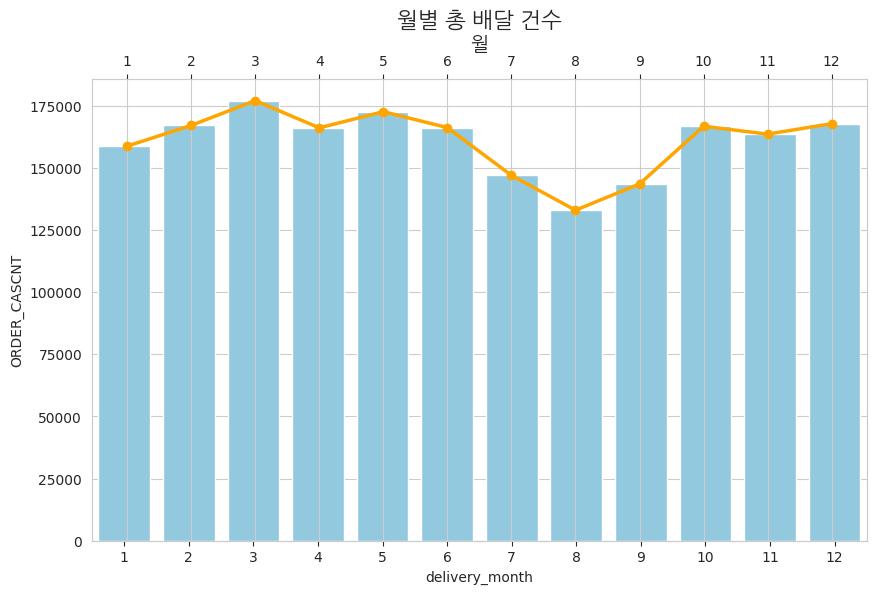

In [17]:
combined_df['delivery_month'] = pd.to_datetime(combined_df['DE']).dt.month

combined_df = combined_df[combined_df['delivery_month'].between(1, 12)]

monthly_orders = combined_df.groupby('delivery_month')['ORDER_CASCNT'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bar = sns.barplot(data=monthly_orders, x='delivery_month', y='ORDER_CASCNT', color='skyblue')

ax2 = plt.twiny()
ax2.plot(monthly_orders['delivery_month'], monthly_orders['ORDER_CASCNT'], marker='o', color='orange', linewidth=2.5)
ax2.set_xlabel('월', fontproperties=fontprop, fontsize=14)

ax2.set_xticks(monthly_orders['delivery_month'])
ax2.set_xticklabels(monthly_orders['delivery_month'])

plt.title('월별 총 배달 건수', fontproperties=fontprop, fontsize=16)
plt.xlabel('월', fontproperties=fontprop, fontsize=14)
plt.ylabel('총 배달 건수', fontproperties=fontprop, fontsize=14)

plt.show()

- 배달(월)별로 총 배달건수 계산

In [18]:
combined_df['delivery_month'] = pd.to_datetime(combined_df['DE']).dt.month

combined_df = combined_df[combined_df['delivery_month'].between(1, 12)]

monthly_orders = combined_df.groupby('delivery_month')['ORDER_CASCNT'].sum().reset_index()

print(monthly_orders)

    delivery_month  ORDER_CASCNT
0                1        158948
1                2        167289
2                3        177302
3                4        166303
4                5        172840
5                6        166399
6                7        147157
7                8        133136
8                9        143701
9               10        166958
10              11        163780
11              12        167999


## (3) 월별 평균 기온 그래프

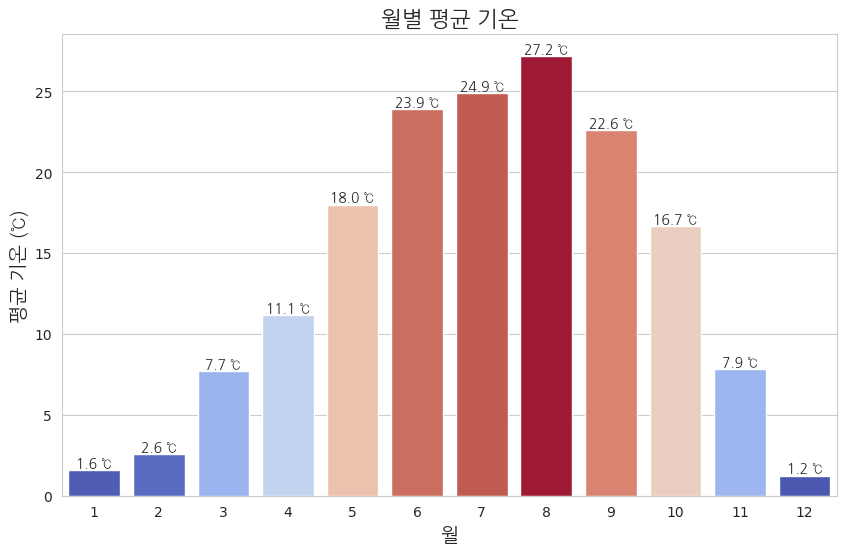

In [19]:
combined_df['월'] = pd.to_datetime(combined_df['DE']).dt.month

monthly_avg_temperature = combined_df.groupby('월')['avgTa'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")

cmap = plt.get_cmap('coolwarm')

bar = sns.barplot(data = monthly_avg_temperature, x = '월', y = 'avgTa', hue = '월', dodge = False, palette = [cmap(x) for x in (monthly_avg_temperature['avgTa'] - monthly_avg_temperature['avgTa'].min()) / (monthly_avg_temperature['avgTa'].max() - monthly_avg_temperature['avgTa'].min())])

plt.legend([],[], frameon = False)

plt.title('월별 평균 기온', fontproperties = fontprop, fontsize = 16)
plt.xlabel('월', fontproperties = fontprop, fontsize = 14)
plt.ylabel('평균 기온 (℃)', fontproperties = fontprop, fontsize = 14)

for index, value in enumerate(monthly_avg_temperature['avgTa']):
    plt.text(index, value, f'{value:.1f} ℃', ha = 'center', va = 'bottom', fontsize = 10, fontproperties = fontprop)

plt.show()

## (3-2) 월별 평균 기온에 대한 평균 배달 건수 그래프

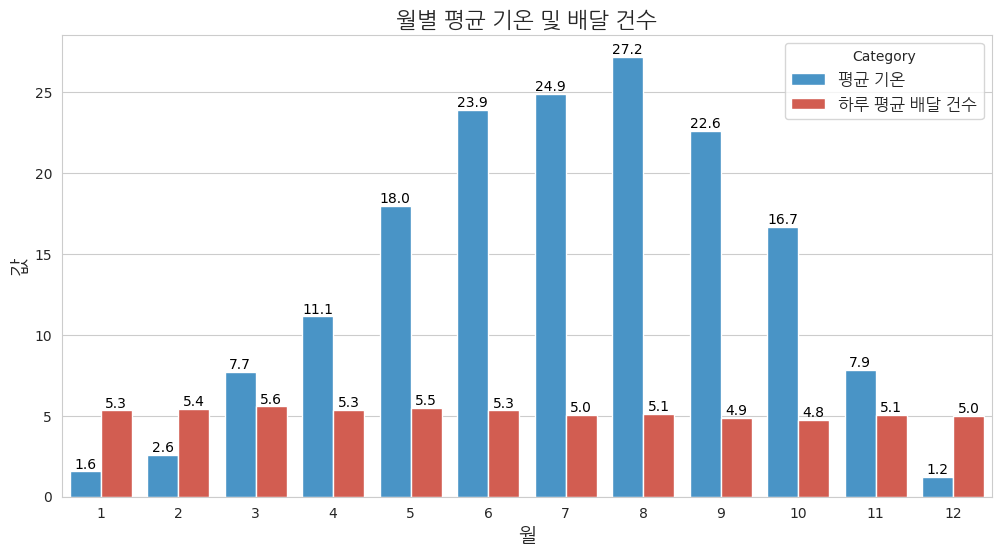

In [20]:
combined_df['월'] = pd.to_datetime(combined_df['DE']).dt.month

monthly_avg_temperature = combined_df.groupby('월')['avgTa'].mean().reset_index().rename(columns = {'avgTa': '평균 기온'})
monthly_avg_orders = combined_df.groupby('월')['ORDER_CASCNT'].mean().reset_index().rename(columns = {'ORDER_CASCNT': '하루 평균 배달 건수'})

monthly_avg = pd.merge(monthly_avg_temperature, monthly_avg_orders, on = '월')

monthly_avg_long = pd.melt(monthly_avg, id_vars = '월', var_name = 'Category', value_name = 'Value')

plt.figure(figsize = (12, 6))
palette = sns.color_palette(["#3498db", "#e74c3c"])
bar = sns.barplot(data = monthly_avg_long, x = '월', y = 'Value', hue = 'Category', palette = palette)
plt.title('월별 평균 기온 및 배달 건수', fontproperties = fontprop, fontsize = 16)
plt.xlabel('월', fontproperties = fontprop, fontsize = 14)
plt.ylabel('값', fontproperties = fontprop, fontsize = 14)
plt.legend(title = 'Category', prop = fontprop)

for p in bar.patches:
    value = p.get_height()
    if value > 0.1:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

plt.show()

## (4) 월별 평균 강수량 그래프

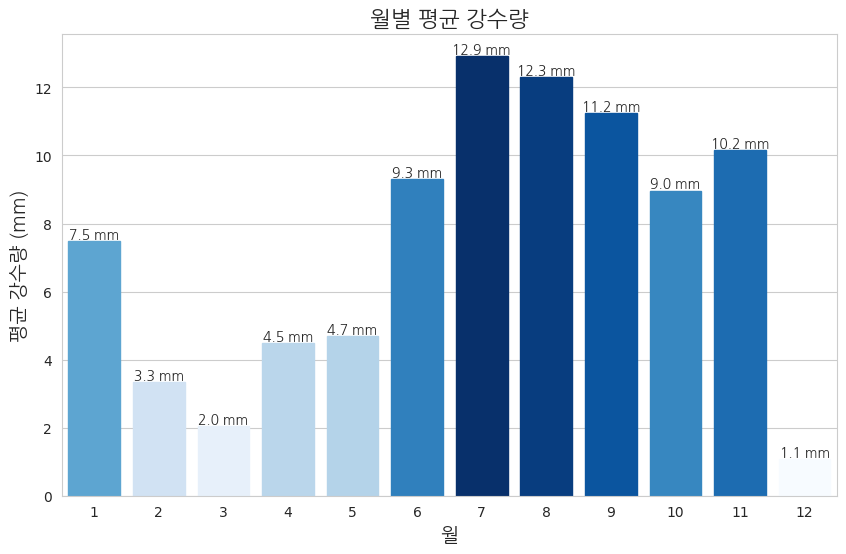

In [21]:
combined_df['월'] = pd.to_datetime(combined_df['DE']).dt.month

monthly_avg_precipitation = combined_df.groupby('월')['sumRn'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")

bar = sns.barplot(data = monthly_avg_precipitation, x = '월', y = 'sumRn', color = 'skyblue')

plt.title('월별 평균 강수량', fontproperties = fontprop, fontsize = 16)
plt.xlabel('월', fontproperties = fontprop, fontsize = 14)
plt.ylabel('평균 강수량 (mm)', fontproperties = fontprop, fontsize = 14)

for index, value in enumerate(monthly_avg_precipitation['sumRn']):
    plt.text(index, value, f'{value:.1f} mm', ha = 'center', va = 'bottom', fontsize = 10, fontproperties = fontprop, fontweight = 'bold')

# 강수량에 대한 그라데이션 색상 적용
norm = mcolors.Normalize(vmin = monthly_avg_precipitation['sumRn'].min(), vmax = monthly_avg_precipitation['sumRn'].max())
for bar, value in zip(bar.patches, monthly_avg_precipitation['sumRn']):
    bar.set_color(plt.cm.Blues(norm(value)))

plt.show()

## (4-2) 월별 평균 강수량에 대한 평균 배달 건수 그래프

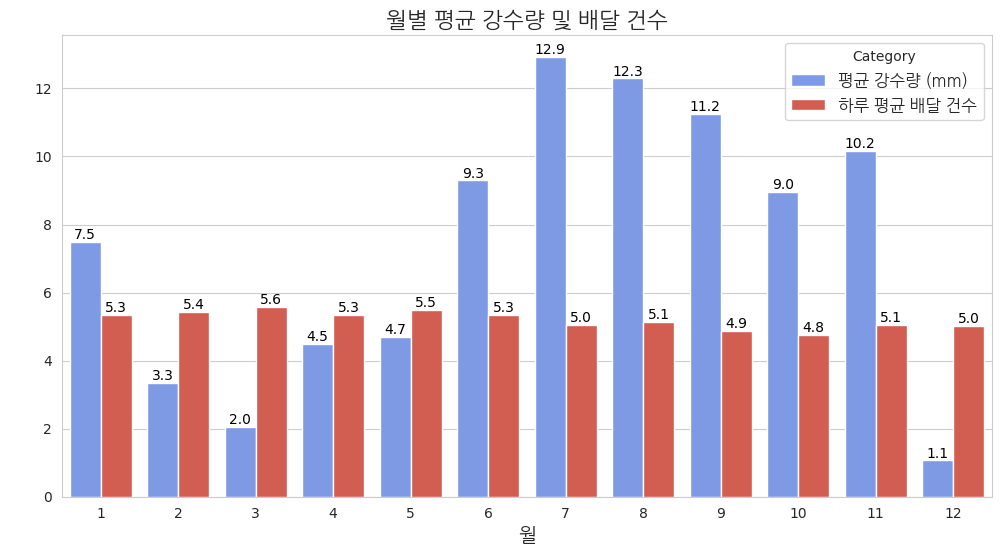

In [22]:
monthly_avg_orders = combined_df.groupby('월')['ORDER_CASCNT'].mean().reset_index().rename(columns = {'ORDER_CASCNT': '하루 평균 배달 건수'})

monthly_avg = pd.merge(monthly_avg_precipitation.rename(columns = {'sumRn': '평균 강수량 (mm)'}), monthly_avg_orders, on = '월')

monthly_avg_long = pd.melt(monthly_avg, id_vars = '월', var_name = 'Category', value_name = 'Value')

plt.figure(figsize = (12, 6))
sns.set_style("whitegrid")
palette = sns.color_palette(["#6e92f5", "#e74c3c"])
bar = sns.barplot(data = monthly_avg_long, x = '월', y = 'Value', hue = 'Category', palette = palette)
plt.title('월별 평균 강수량 및 배달 건수', fontproperties = fontprop, fontsize = 16)
plt.xlabel('월', fontproperties = fontprop, fontsize = 14)
plt.ylabel(' ', fontproperties = fontprop, fontsize = 14)
plt.legend(title = 'Category', prop = fontprop)

for idx, p in enumerate(bar.patches):
    value = p.get_height()
    if value > 0:
        plt.text(p.get_x() + p.get_width() / 2., value, f'{value:.1f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

plt.show()

## (5) 요일별 누적 배달건수 그래프

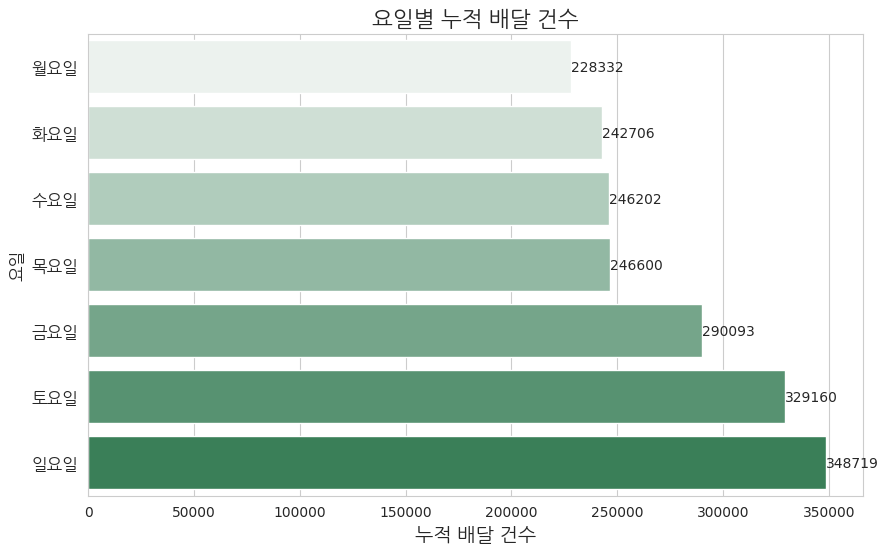

In [23]:
delivery_df['DayOfWeek'] = delivery_df['DE'].dt.day_name()

total_orders_by_day = delivery_df.groupby('DayOfWeek')['ORDER_CASCNT'].sum().reset_index()

sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_orders_by_day['DayOfWeek'] = pd.Categorical(total_orders_by_day['DayOfWeek'], categories = sort_order, ordered = True)
total_orders_by_day = total_orders_by_day.sort_values('DayOfWeek')

plt.figure(figsize = (10, 6))
palette = sns.light_palette("seagreen", reverse = False, n_colors = len(total_orders_by_day))
bar = sns.barplot(data = total_orders_by_day, x = 'ORDER_CASCNT', y = 'DayOfWeek', hue = 'DayOfWeek', dodge = False, palette = palette)

bar.set_yticks(range(len(total_orders_by_day)))
bar.set_yticklabels(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], fontproperties = fontprop)

for p in bar.patches:
    width = p.get_width()
    plt.text(width + 3,
             p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width),
             va = 'center')

plt.legend([], [], frameon = False)
plt.title('요일별 누적 배달 건수', fontproperties = fontprop, fontsize = 16)
plt.xlabel('누적 배달 건수', fontproperties = fontprop, fontsize = 14)
plt.ylabel('요일', fontproperties = fontprop)
plt.show()

## (6) 카테고리별 하루 평균 배달 건수 그래프

In [24]:
# 카테고리별 배달 건수 평균 계산
category_order_avg = combined_df.groupby('DLVR_STORE_INDUTY_NM')['ORDER_CASCNT'].mean().reset_index()

# 값이 많은 순서대로 정렬
category_order_avg_sorted = category_order_avg.sort_values(by = 'ORDER_CASCNT', ascending = False)

print("카테고리별 주문 건수 평균 : ")
print(category_order_avg_sorted)

카테고리별 주문 건수 평균 : 
   DLVR_STORE_INDUTY_NM  ORDER_CASCNT
10                   치킨     10.276050
3                    분식      6.966174
12                패스트푸드      5.762592
7                 족발/보쌈      5.262023
11               카페/디저트      4.887787
14                   한식      4.717100
13                   피자      3.977715
6                    야식      3.566588
2                배달전문업체      3.562144
1                돈까스/일식      3.529226
8                    중식      3.387966
5                아시안/양식      3.223517
9                    찜탕      2.516980
15                    회      2.371736
0                   도시락      1.718359
4                   심부름      1.630407


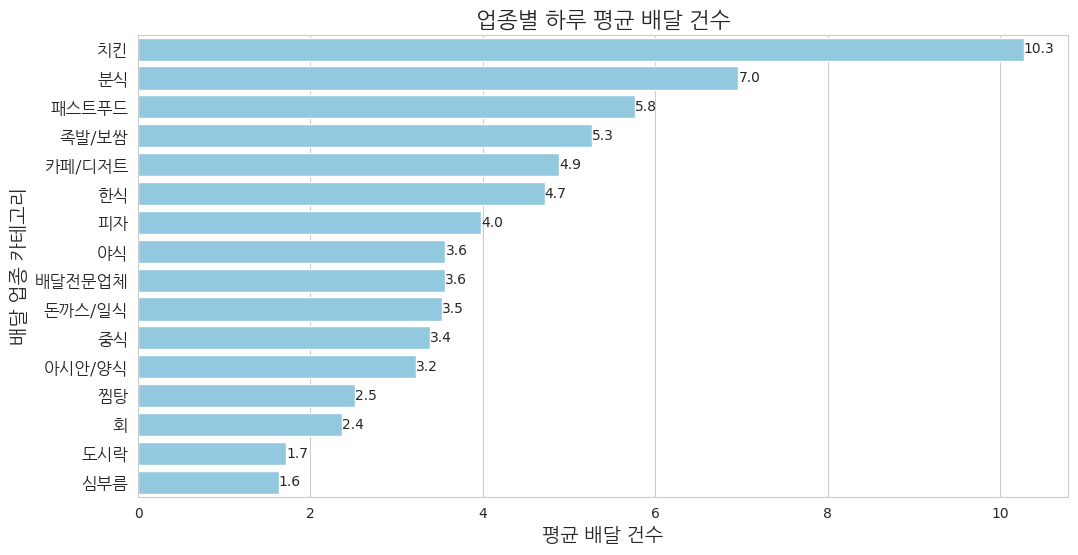

In [25]:
category_avg_orders = combined_df.groupby('DLVR_STORE_INDUTY_NM')['ORDER_CASCNT'].mean().reset_index().rename(columns = {'ORDER_CASCNT': '평균 배달 건수'})

category_avg_orders_sorted = category_avg_orders.sort_values(by = '평균 배달 건수', ascending = False)

plt.figure(figsize = (12, 6))
sns.set_style("whitegrid")
bar = sns.barplot(data = category_avg_orders_sorted, x = '평균 배달 건수', y = 'DLVR_STORE_INDUTY_NM', color = 'skyblue')
plt.title('업종별 하루 평균 배달 건수', fontproperties = fontprop, fontsize = 16)
plt.xlabel('평균 배달 건수', fontproperties = fontprop, fontsize = 14)
plt.ylabel('배달 업종 카테고리', fontproperties = fontprop, fontsize = 14)

for p in bar.patches:
    value = p.get_width()
    plt.text(value, p.get_y() + p.get_height() / 2., f'{value:.1f}', ha = 'left', va = 'center', fontsize = 10)

category_labels = ['치킨', '분식', '패스트푸드', '족발/보쌈', '카페/디저트', '한식', '피자', '야식', '배달전문업체', '돈까스/일식', '중식', '아시안/양식', '찜탕', '회', '도시락', '심부름']

bar.set_yticks(range(len(category_labels)))
bar.set_yticklabels(category_labels, fontproperties = fontprop)

plt.show()

## (7) 카테고리별 총 배달 건수 계산 그래프

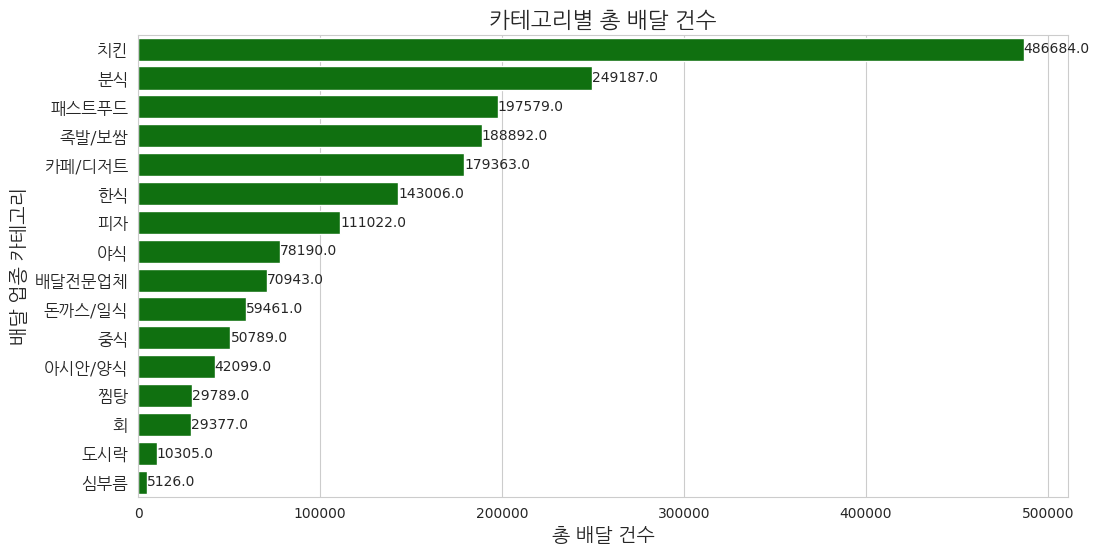

In [26]:
category_total_orders = combined_df.groupby('DLVR_STORE_INDUTY_NM')['ORDER_CASCNT'].sum().reset_index().rename(columns = {'ORDER_CASCNT': '총 배달 건수'})

category_total_orders_sorted = category_total_orders.sort_values(by = '총 배달 건수', ascending = False)

plt.figure(figsize = (12, 6))
sns.set_style("whitegrid")
bar = sns.barplot(data = category_total_orders_sorted, x = '총 배달 건수', y = 'DLVR_STORE_INDUTY_NM', color = 'green')
plt.title('카테고리별 총 배달 건수', fontproperties = fontprop, fontsize = 16)
plt.xlabel('총 배달 건수', fontproperties = fontprop, fontsize = 14)
plt.ylabel('배달 업종 카테고리', fontproperties = fontprop, fontsize = 14)

for p in bar.patches:
    value = p.get_width()
    plt.text(value, p.get_y() + p.get_height() / 2., f'{value:.1f}', ha = 'left', va = 'center', fontsize = 10)

category_labels = ['치킨', '분식', '패스트푸드', '족발/보쌈', '카페/디저트', '한식', '피자', '야식', '배달전문업체', '돈까스/일식', '중식', '아시안/양식', '찜탕', '회', '도시락', '심부름']
bar.set_yticks(range(len(category_labels)))
bar.set_yticklabels(category_labels, fontproperties = fontprop)

plt.show()

## (8) 월별 평균 상대습도에 대한 월별 평균 배달 건수 그래프

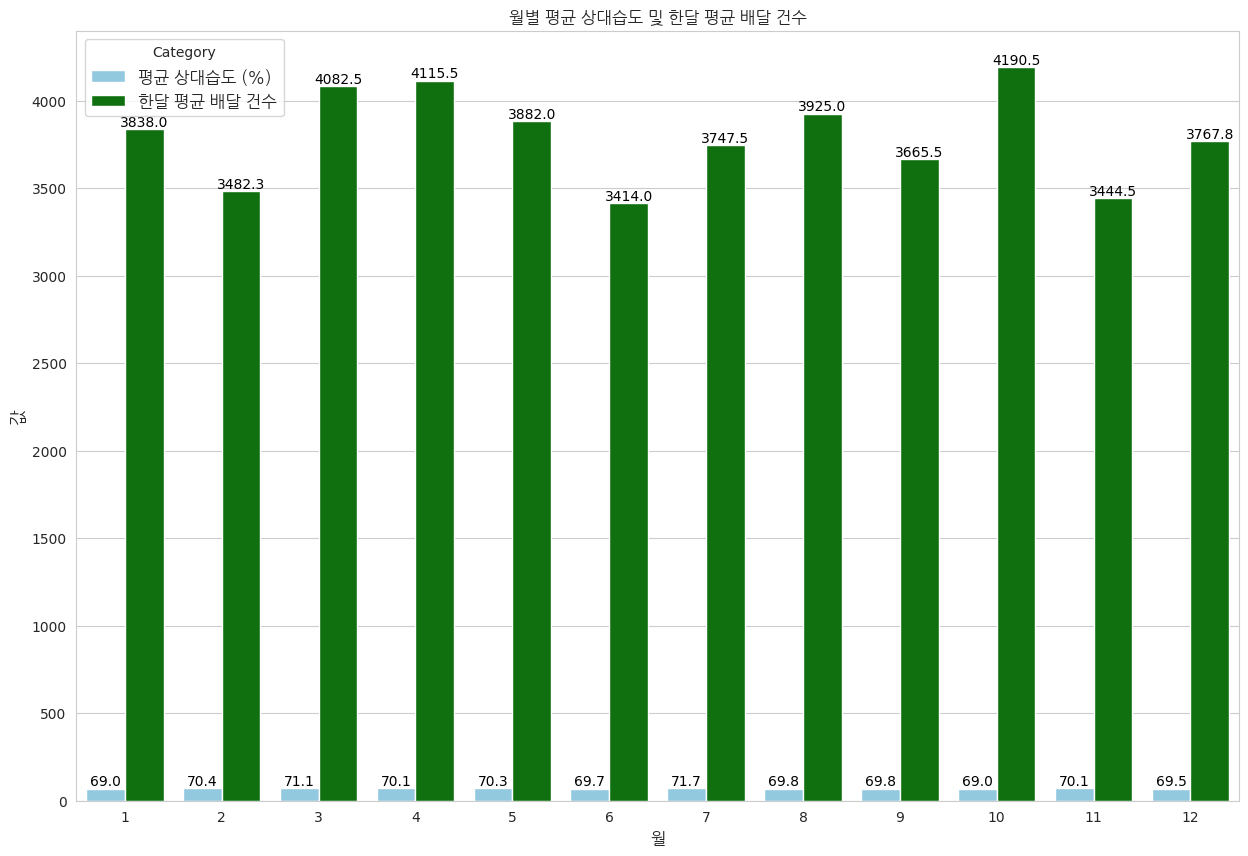

In [27]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = 'matplotlib')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

font_path = '/content/NanumGothic.ttf'
fontprop = fm.FontProperties(fname = font_path, size = 12)
plt.rcParams['font.family'] = fontprop.get_name()

combined_df = pd.DataFrame({
    'DE': pd.date_range(start = '1/1/2019', periods = 365 * 2, freq = 'D'),
    'avgRhm': np.random.uniform(50, 90, 365 * 2),
    'ORDER_CASCNT': np.random.randint(50, 200, 365 * 2)
})

month_days = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

combined_df['월'] = pd.to_datetime(combined_df['DE']).dt.month

monthly_avg_humidity = combined_df.groupby('월')['avgRhm'].mean().reset_index()
monthly_avg_orders = combined_df.groupby('월')['ORDER_CASCNT'].mean().reset_index()

monthly_avg_orders['ORDER_CASCNT'] *= monthly_avg_orders['월'].map(month_days)

monthly_avg_humidity['Category'] = '평균 상대습도 (%)'
monthly_avg_orders['Category'] = '한달 평균 배달 건수'

monthly_avg_combined = pd.concat([
    monthly_avg_humidity.rename(columns = {'avgRhm': 'Value'}),
    monthly_avg_orders.rename(columns = {'ORDER_CASCNT': 'Value'})
])

plt.figure(figsize = (15, 10))
palette = {'평균 상대습도 (%)': 'skyblue', '한달 평균 배달 건수': 'green'}
bar = sns.barplot(data = monthly_avg_combined, x = '월', y = 'Value', hue = 'Category', palette = palette)
plt.title('월별 평균 상대습도 및 한달 평균 배달 건수', fontproperties = fontprop)
plt.xlabel('월', fontproperties = fontprop)
plt.ylabel('값', fontproperties = fontprop)
plt.legend(title = 'Category', prop = fontprop)

for p in bar.patches:
    value = p.get_height()
    if value > 0:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
                 f'{value:.1f}',
                 ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

plt.show()

## (8-2) 월별 평균 상대습도에 대한 하루 평균 배달 건수 그래프

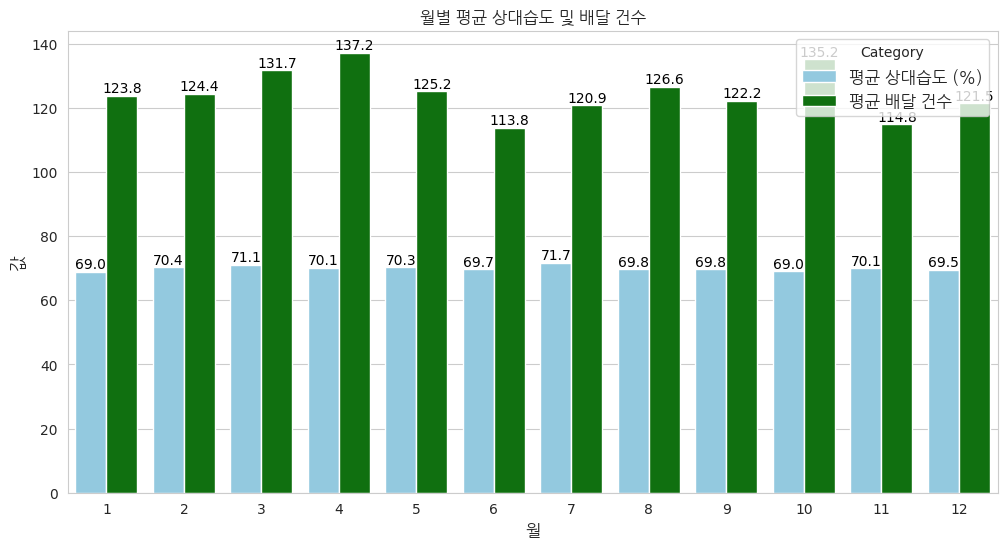

In [28]:
combined_df['월'] = pd.to_datetime(combined_df['DE']).dt.month

monthly_avg_humidity = combined_df.groupby('월')['avgRhm'].mean().reset_index()
monthly_avg_orders = combined_df.groupby('월')['ORDER_CASCNT'].mean().reset_index()

monthly_avg_humidity['Category'] = '평균 상대습도 (%)'
monthly_avg_orders['Category'] = '평균 배달 건수'

monthly_avg_combined = pd.concat([
    monthly_avg_humidity.rename(columns={'avgRhm': 'Value'}),
    monthly_avg_orders.rename(columns={'ORDER_CASCNT': 'Value'})
])

plt.figure(figsize=(12, 6))
palette = {'평균 상대습도 (%)': 'skyblue', '평균 배달 건수': 'green'}
bar = sns.barplot(data=monthly_avg_combined, x='월', y='Value', hue='Category', palette=palette)
plt.title('월별 평균 상대습도 및 배달 건수', fontproperties=fontprop)
plt.xlabel('월', fontproperties=fontprop)
plt.ylabel('값', fontproperties=fontprop)
plt.legend(title='Category', prop=fontprop)

for p in bar.patches:
    value = p.get_height()
    if value > 0:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
                 f'{value:.1f}',
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()